## Descriptive Statistics

In this section, we will perform basic descriptive statistics to understand the structure of our data, including headline lengths, the number of articles per publisher, and the distribution of publication dates.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('data/raw_analyst_ratings/raw_analyst_ratings.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)

# Basic statistics on headline lengths
headline_stats = df['headline_length'].describe()
headline_stats

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [8]:
# Count the number of articles per publisher
articles_per_publisher = df['publisher'].value_counts()
articles_per_publisher.head(10)  # Display the top 10 publishers

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

C:\Users\surafel\AppData\Local\Temp\ipykernel_22188\1223251671.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date'].dt.to_period('Y').value_counts().sort_index().plot(kind='line', marker='o', color='purple')


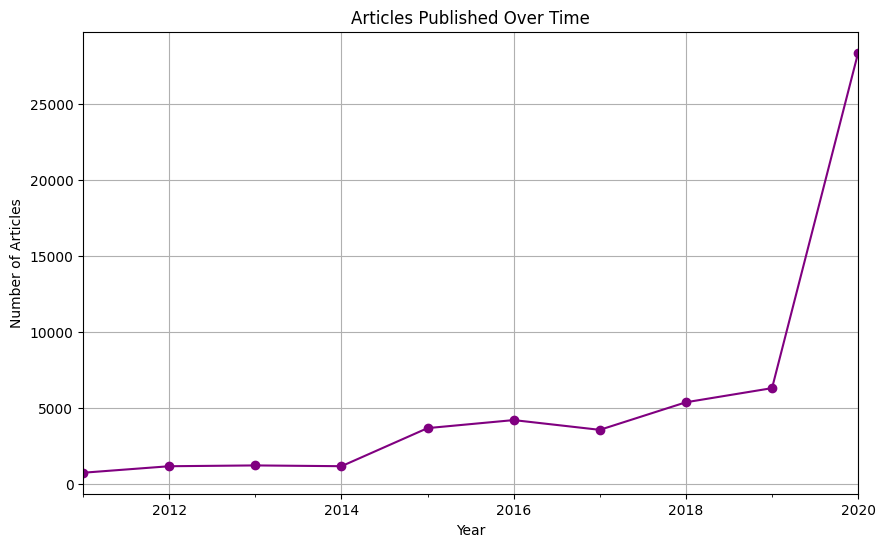

In [14]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# Plot the number of articles published over time by year
plt.figure(figsize=(10, 6))
df['date'].dt.to_period('Y').value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.title('Articles Published Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


### Key Findings from Descriptive Statistics and Time Series Analysis

#### Descriptive Statistics
1. **Headline Lengths**:
    - The average length of headlines is approximately 73 characters.
    - The shortest headline is 3 characters long, while the longest is 512 characters.
    - The distribution of headline lengths shows that 50% of the headlines are shorter than 64 characters, and 75% are shorter than 87 characters.

2. **Articles per Publisher**:
    - The top 10 publishers have a significant number of articles, with the highest being Paul Quintaro with 228,373 articles.
    - Other notable publishers include Lisa Levin (186,979 articles) and Benzinga Newsdesk (150,484 articles).

3. **Publication Dates**:
    - The dataset contains articles published over several years, with a noticeable increase in the number of articles published in recent years.

#### Time Series Analysis
The graph above shows the number of articles published over time, aggregated by year. Here are the key observations:

1. **Trend Over Time**:
    - There is a clear upward trend in the number of articles published over the years.
    - The number of articles remained relatively low and stable until around 2014, after which there was a gradual increase.
    - A significant spike in the number of articles is observed in 2020, indicating a substantial increase in publication activity.

2. **Yearly Analysis**:
    - From 2012 to 2014, the number of articles published each year was minimal.
    - Between 2014 and 2018, there was a steady increase in the number of articles, with minor fluctuations.
    - The most dramatic increase occurred between 2018 and 2020, with the number of articles more than doubling in 2020 compared to previous years.